In [2]:
import lhsmdu
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import csv
from scipy.stats.qmc import LatinHypercube  
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import pandas as pd
import plotly
import plotly.graph_objs as go

import random 



In [3]:

'''A Latin hypercube sample [1] generates  points in . Each univariate 
marginal distribution is stratified, placing exactly one point in  for . 
They are still applicable when .'''
random.seed(0)
engine = LatinHypercube(d=5)
sample = engine.random(n=5000)



In [4]:
E=59*10**9

In [5]:
LHS_dataframe=pd.DataFrame(sample)

In [10]:
LHS_dataframe.to_csv('LHS_sampling.csv',index=False) 

In [11]:
Samples=pd.read_csv('LHS_sampling.csv')

In [16]:
Samples.drop(['2',

'3','4'],axis=1)

,0,1
0,0.057141,0.022368
1,0.507068,0.297431
2,0.799798,0.768415
3,0.510543,0.169698
4,0.235435,0.613772
...,...,...
4995,0.771364,0.330012
4996,0.936863,0.009964
4997,0.619450,0.306379
4998,0.342470,0.696956


In [19]:
Samples['magnetic field'] =Samples['0']*31908
Samples['Stress_100'] =Samples['1']*0.8*60*10**6
# Samples['Magnetisation'] =Samples['Magnetisation']*1.450*10**6
# Samples['Strain'] =Samples['Strain']*2.5490*10**(-4)
# Samples['magnetostriction'] =Samples['magnetostriction']*(Samples['magnetostriction']-Samples['Stress_100']/E)


In [20]:
Samples_Generated=Samples

In [31]:

Samples_Generated['stress_2']=0
Samples_Generated['stress_3']=0
Samples_Generated['stress_4']=0
Samples_Generated['stress_5']=0
Samples_Generated['stress_6']=0
LHS=Samples_Generated.drop(['0','1','2','3','4'],axis=1)

In [32]:
LHS.to_csv('Samples_generated_LHS_5000.csv')### Final samples input to MATLAB

In [33]:
Visualise=pd.read_csv('Samples_generated.csv')

In [3]:
Visualise.columns
Data=Visualise.drop(['Unnamed: 0'],axis=1)

In [42]:
Data.columns

Index(['magnetic field', 'Stress_100', 'Magnetisation', 'magnetostriction',
       'Strain'],
      dtype='object')

In [45]:
LHS_input=Data.drop(['Magnetisation', 'magnetostriction',
       'Strain'],axis=1)


In [47]:
LHS_input.to_csv('LHS_input.csv')
LHS_input.columns

Index(['magnetic field', 'Stress_100'], dtype='object')

Text(0, 0.5, 'magnetic field')

<Figure size 360x360 with 0 Axes>

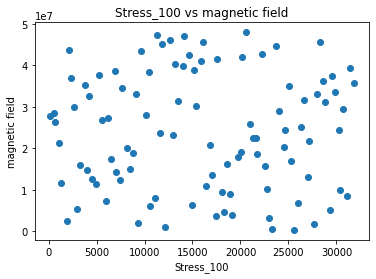

In [4]:
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.title("Stress_100 vs magnetic field")
plt.scatter( Visualise['magnetic field'],Visualise['Stress_100'])
plt.xlabel("Stress_100")
plt.ylabel("magnetic field")


Text(0, 0.5, 'Magnetisation')

<Figure size 360x360 with 0 Axes>

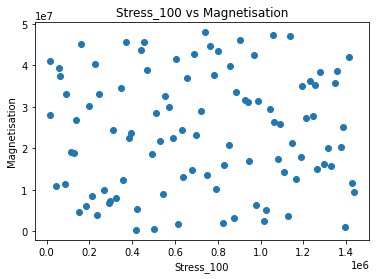

In [5]:
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.title("Stress_100 vs Magnetisation")
plt.scatter( Visualise['Magnetisation'],Visualise['Stress_100'])
plt.xlabel("Stress_100")
plt.ylabel("Magnetisation")



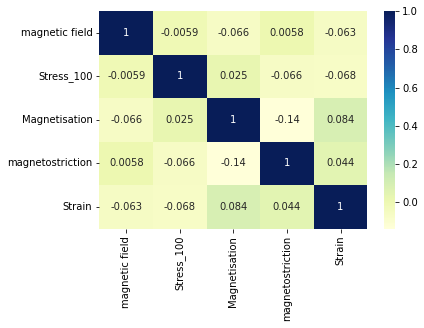

In [6]:
# print(Data.corr())
dataplot = sns.heatmap(Data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [16]:
mm = preprocessing.MinMaxScaler()

Min_max_scaling = mm.fit_transform(Data)
Min_max=pd.DataFrame(Min_max_scaling,columns=['magnetic field', 'Stress_100', 'Magnetisation', 'magnetostriction',
       'Strain'])

In [25]:
y =['c1','c2','c3','c4','c5']

In [17]:
Min_max.head()

,magnetic field,Stress_100,Magnetisation,magnetostriction,Strain
0,1.000000,0.744056,0.936570,0.581696,0.194128
1,0.201376,0.358133,0.750682,0.249190,0.104879
2,0.253917,0.415970,0.915204,0.528286,0.343007
3,0.129215,0.676066,0.379828,0.645088,0.967203
4,0.936279,0.700142,0.611363,0.090807,0.930512


In [40]:

#Set marker properties
markersize = Data['Magnetisation']
markercolor =Data['magnetostriction']


#Make Plotly figure
fig1 = go.Scatter3d(x=Data['Stress_100'],
                    y=Data['magnetic field'],
                    z=Data['Strain'],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.5,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Stress"),
                                yaxis=dict( title="h"),
                                zaxis=dict(title="s")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("5D Plot.html"))

'5D Plot.html'